In [72]:
# SPARK_HOME="/Users/ssv/spark-2.2.0-bin-hadoop2.7"
import os
import sys
os.environ["PYSPARK_SUBMIT_ARGS"]='--packages com.databricks:spark-csv_2.10:1.2.0 pyspark-shell'
os.environ["PYSPARK_PYTHON"]='python3'
# os.environ["SPARK_HOME"]='/usr/hdp/current/spark2-client'
os.environ["SPARK_HOME"]='/Users/ssv/spark-2.2.0-bin-hadoop2.7'

spark_home = os.environ.get('SPARK_HOME', None)
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.4-src.zip'))
os.environ["PYSPARK_PYTHON"] = 'python3'
exec(open(os.path.join(spark_home, 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.2.0
      /_/

Using Python version 3.6.2 (default, Sep 21 2017 18:29:43)
SparkSession available as 'spark'.


In [2]:
from pyspark.sql import SparkSession
import json

In [4]:
?spark.read

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
spark.

In [6]:
 filename = '/Users/ssv/newprolab/labs/lab07/DO_record_per_line.json'

In [7]:
sc.textFile(filename).take(2)

['{"lang": "en", "name": "Accounting Cycle: The Foundation of Business Measurement and Reporting", "cat": "3/business_management|6/economics_finance", "provider": "Canvas Network", "id": 4, "desc": "This course introduces the basic financial statements used by most businesses, as well as the essential tools used to prepare them. This course will serve as a resource to help business students succeed in their upcoming university-level accounting classes, and as a refresher for upper division accounting students who are struggling to recall elementary concepts essential to more advanced accounting topics. Business owners will also benefit from this class by gaining essential skills necessary to organize and manage information pertinent to operating their business. At the conclusion of the class, students will understand the balance sheet, income statement, and cash flow statement. They will be able to differentiate between cash basis and accrual basis techniques, and know when each is app

In [6]:
sc.textFile("/recsys/DO.json").take(25)

['[',
 '  {',
 '    "id": 4,',
 '    "lang": "en",',
 '    "name": "Accounting Cycle: The Foundation of Business Measurement and Reporting",',
 '    "desc": "This course introduces the basic financial statements used by most businesses, as well as the essential tools used to prepare them. This course will serve as a resource to help business students succeed in their upcoming university-level accounting classes, and as a refresher for upper division accounting students who are struggling to recall elementary concepts essential to more advanced accounting topics. Business owners will also benefit from this class by gaining essential skills necessary to organize and manage information pertinent to operating their business. At the conclusion of the class, students will understand the balance sheet, income statement, and cash flow statement. They will be able to differentiate between cash basis and accrual basis techniques, and know when each is appropriate. They’ll also understand the acc

In [8]:
json_data = spark.read.json(filename)

In [9]:
json_data

DataFrame[cat: string, desc: string, id: bigint, lang: string, name: string, provider: string]

In [10]:
json_data.show()

+--------------------+--------------------+---+----+--------------------+--------------+
|                 cat|                desc| id|lang|                name|      provider|
+--------------------+--------------------+---+----+--------------------+--------------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|Canvas Network|
|  14/social_sciences|The goal of the D...| 11|  en|Digital Literacie...|Canvas Network|
|  14/social_sciences

In [11]:
json_data_2 = sc.textFile("DO_record_per_line.json")
json_data_2.take(5)

['{"lang": "en", "name": "Accounting Cycle: The Foundation of Business Measurement and Reporting", "cat": "3/business_management|6/economics_finance", "provider": "Canvas Network", "id": 4, "desc": "This course introduces the basic financial statements used by most businesses, as well as the essential tools used to prepare them. This course will serve as a resource to help business students succeed in their upcoming university-level accounting classes, and as a refresher for upper division accounting students who are struggling to recall elementary concepts essential to more advanced accounting topics. Business owners will also benefit from this class by gaining essential skills necessary to organize and manage information pertinent to operating their business. At the conclusion of the class, students will understand the balance sheet, income statement, and cash flow statement. They will be able to differentiate between cash basis and accrual basis techniques, and know when each is app

In [11]:
data = json_data_2.map(lambda x: json.loads(x))
data.take(3)

[{'cat': '3/business_management|6/economics_finance',
  'desc': 'This course introduces the basic financial statements used by most businesses, as well as the essential tools used to prepare them. This course will serve as a resource to help business students succeed in their upcoming university-level accounting classes, and as a refresher for upper division accounting students who are struggling to recall elementary concepts essential to more advanced accounting topics. Business owners will also benefit from this class by gaining essential skills necessary to organize and manage information pertinent to operating their business. At the conclusion of the class, students will understand the balance sheet, income statement, and cash flow statement. They will be able to differentiate between cash basis and accrual basis techniques, and know when each is appropriate. They’ll also understand the accounting equation, how to journalize and post transactions, how to adjust and close accounts, 

In [12]:
json_data = spark.read.json("DO_record_per_line.json")

In [13]:
json_data

DataFrame[cat: string, desc: string, id: bigint, lang: string, name: string, provider: string]

using dataframes

https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame

https://spark.apache.org/docs/latest/sql-programming-guide.html

Comparing Pandas and Spark dataframes:

https://lab.getbase.com/pandarize-spark-dataframes/

https://www.slideshare.net/databricks/spark-sqlsse2015public/14

## Dataframes

In [14]:
json_data.printSchema()

root
 |-- cat: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- id: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- name: string (nullable = true)
 |-- provider: string (nullable = true)



In [15]:
json_data.show()

+--------------------+--------------------+---+----+--------------------+--------------+
|                 cat|                desc| id|lang|                name|      provider|
+--------------------+--------------------+---+----+--------------------+--------------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|Canvas Network|
|  14/social_sciences|The goal of the D...| 11|  en|Digital Literacie...|Canvas Network|
|  14/social_sciences

In [26]:
json_data.filter(json_data.id == 16627).show()

+---+--------------------+-----+----+--------------------+--------+
|cat|                desc|   id|lang|                name|provider|
+---+--------------------+-----+----+--------------------+--------+
|   | Hazte más emplea...|16627|  es|Aprende Excel: Ni...|   Udemy|
+---+--------------------+-----+----+--------------------+--------+



In [15]:
json_data.show()

+--------------------+--------------------+---+----+--------------------+--------------+
|                 cat|                desc| id|lang|                name|      provider|
+--------------------+--------------------+---+----+--------------------+--------------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|Canvas Network|
|  14/social_sciences|The goal of the D...| 11|  en|Digital Literacie...|Canvas Network|
|  14/social_sciences

In [27]:
df = json_data

In [28]:
df.select("cat").show()

+--------------------+
|                 cat|
+--------------------+
|3/business_manage...|
|              11/law|
|5/computer_scienc...|
|  14/social_sciences|
|2/biology_life_sc...|
|9/humanities|15/m...|
|  14/social_sciences|
|  14/social_sciences|
|  14/social_sciences|
|  14/social_sciences|
|  12/medicine_health|
|        16/languages|
|         4/chemistry|
|8/engineering_tec...|
|   1/arts_music_film|
|        9/humanities|
|  14/social_sciences|
|        9/humanities|
|8/engineering_tec...|
|  14/social_sciences|
+--------------------+
only showing top 20 rows



In [29]:
df.select("cat")

DataFrame[cat: string]

In [30]:
df["cat"]

Column<b'cat'>

In [31]:
df.cat

Column<b'cat'>

In [32]:
col = df.cat

In [22]:
col.

SyntaxError: invalid syntax (<ipython-input-22-c34d512602ca>, line 1)

In [37]:
df.filter('id = 23126 or id = 21617 or id = 16627 or id = 11556 or id = 16704 or id = 13702').show()

+--------------------+--------------------+-----+----+--------------------+--------+
|                 cat|                desc|   id|lang|                name|provider|
+--------------------+--------------------+-----+----+--------------------+--------+
|                    | La transformació...|11556|  es|Aprendizaje Colab...|   Udemy|
|6/economics_finan...|Математическая эк...|13702|  ru|Математическая эк...|  Intuit|
|                    | Hazte más emplea...|16627|  es|Aprende Excel: Ni...|   Udemy|
|5/computer_scienc...|В курсе рассматри...|16704|  ru|Программирование ...|  Intuit|
|  5/computer_science|An introduction t...|21617|  en|Preparing for the...|     edX|
|                    | Improve your SAS...|23126|  en|Compass - powerfu...|   Udemy|
+--------------------+--------------------+-----+----+--------------------+--------+



In [34]:
df.filter("id = 12").show()

+------------------+--------------------+---+----+--------------------+--------------+
|               cat|                desc| id|lang|                name|      provider|
+------------------+--------------------+---+----+--------------------+--------------+
|14/social_sciences|Ready to explore ...| 12|  en|Digital Tools for...|Canvas Network|
+------------------+--------------------+---+----+--------------------+--------------+



In [40]:
df.filter("lang = 'es' or lang = 'en' or lang = 'ru' ").count()

27158

In [39]:
df.filter((df.lang == 'es') | (df.lang == 'en')).count()

25927

In [44]:
df.filter(df.name.like("%Scala%")).select(["name", 'id']).show()

+--------------------+-----+
|                name|   id|
+--------------------+-----+
|Functional Progra...|  391|
|Scala for Java De...| 4924|
|Developing Scalab...|16626|
|Scalable Internet...|17609|
|The Seductions of...|17640|
|Beginning Scala P...|19387|
|Scalable Machine ...|21693|
|Learning Scala Pr...|22138|
|Developing Scalab...|26921|
|Scala for Java De...|27728|
+--------------------+-----+



In [45]:
scala_titles = df.filter(df.name.like("%Scala%")).select("name")
scala_titles.collect()

[Row(name='Functional Programming Principles in Scala'),
 Row(name='Scala for Java Developers: Transition Up! by Andreas Lauschke'),
 Row(name='Developing Scalable Apps with Java. with Google App Engine'),
 Row(name='Scalable Internet Architectures'),
 Row(name='The Seductions of Scala'),
 Row(name='Beginning Scala Programming by Infinite Skills'),
 Row(name='Scalable Machine Learning'),
 Row(name='Learning Scala Programming'),
 Row(name='Developing Scalable Apps in Python. with Google App Engine'),
 Row(name='Scala for Java Developers (in Russian) - Udemy')]

In [52]:
scala_titles = df.filter(df.name.rlike("\\bscala\\b")).select("name")
scala_titles.collect()

[Row(name='scala starting - Udemy')]

In [46]:
x = scala_titles.collect()

In [50]:
x[4].name

'The Seductions of Scala'

In [51]:
scala_titles = df.filter(df.name.rlike("\\b[Ss]cala\\b")).select("name")
scala_titles.collect()

[Row(name='Functional Programming Principles in Scala'),
 Row(name='Scala for Java Developers: Transition Up! by Andreas Lauschke'),
 Row(name='The Seductions of Scala'),
 Row(name='Beginning Scala Programming by Infinite Skills'),
 Row(name='Learning Scala Programming'),
 Row(name='Scala for Java Developers (in Russian) - Udemy'),
 Row(name='scala starting - Udemy')]

In [53]:
xx = df.groupBy("provider").count().collect()

In [31]:
df.groupBy("provider").count().show()

+--------------------+-----+
|            provider|count|
+--------------------+-----+
|             Udacity|   89|
|            CodeMonk|    8|
|           Biotech U|    1|
|            Matasano|    1|
|   Open Yale courses|   42|
|              Hexlet|   13|
|         FutureLearn|  151|
|             Acodemy|    5|
|           Postnauka|   26|
|               Amlab|    5|
|               Udemy|16421|
|Open University o...|    4|
|Computer Science ...|   11|
|      Marist College|    1|
|            DataCamp|    9|
|NovoED (Venture-lab)|  124|
|        Universarium|   69|
|          Стратоплан|    5|
| Complexity Explorer|   14|
|         Code School|   42|
+--------------------+-----+
only showing top 20 rows



In [56]:
df.groupBy("provider").count().orderBy("count", ascending=False).show()

+--------------------+-----+
|            provider|count|
+--------------------+-----+
|               Udemy|16421|
|               Lynda| 3590|
|  MIT OpenCourseWare| 2354|
|            Coursera| 1048|
|              Intuit|  946|
|                 edX|  788|
|            O'Reilly|  459|
|               ed2go|  399|
|             Craftsy|  395|
|      Canvas Network|  258|
|Harvard Extension...|  242|
|        OpenLearning|  237|
|         FutureLearn|  151|
|NovoED (Venture-lab)|  124|
|            Iversity|  102|
|             Udacity|   89|
|        Universarium|   69|
|            Stanford|   51|
|          Open2Study|   49|
|                    |   44|
+--------------------+-----+
only showing top 20 rows



In [57]:
df.dtypes

[('cat', 'string'),
 ('desc', 'string'),
 ('id', 'bigint'),
 ('lang', 'string'),
 ('name', 'string'),
 ('provider', 'string')]

In [34]:
df.columns

['cat', 'desc', 'id', 'lang', 'name', 'provider']

In [58]:
df.map(lambda x: x.name).take(5)

AttributeError: 'DataFrame' object has no attribute 'map'

In [59]:
df.rdd.map(lambda x: x.name).take(5)

['Accounting Cycle: The Foundation of Business Measurement and Reporting',
 'American Counter Terrorism Law',
 'Arithmétique: en route pour la cryptographie',
 'Becoming a Dynamic Educator',
 'Bioethics']

In [37]:
df.rdd.take(1)

[Row(cat='3/business_management|6/economics_finance', desc='This course introduces the basic financial statements used by most businesses, as well as the essential tools used to prepare them. This course will serve as a resource to help business students succeed in their upcoming university-level accounting classes, and as a refresher for upper division accounting students who are struggling to recall elementary concepts essential to more advanced accounting topics. Business owners will also benefit from this class by gaining essential skills necessary to organize and manage information pertinent to operating their business. At the conclusion of the class, students will understand the balance sheet, income statement, and cash flow statement. They will be able to differentiate between cash basis and accrual basis techniques, and know when each is appropriate. They’ll also understand the accounting equation, how to journalize and post transactions, how to adjust and close accounts, and h

In [38]:
df.toJSON().take(3)

['{"cat":"3/business_management|6/economics_finance","desc":"This course introduces the basic financial statements used by most businesses, as well as the essential tools used to prepare them. This course will serve as a resource to help business students succeed in their upcoming university-level accounting classes, and as a refresher for upper division accounting students who are struggling to recall elementary concepts essential to more advanced accounting topics. Business owners will also benefit from this class by gaining essential skills necessary to organize and manage information pertinent to operating their business. At the conclusion of the class, students will understand the balance sheet, income statement, and cash flow statement. They will be able to differentiate between cash basis and accrual basis techniques, and know when each is appropriate. They’ll also understand the accounting equation, how to journalize and post transactions, how to adjust and close accounts, and 

In [39]:
df.select(df.name, df.id.between(2, 15).alias('nnn')).show()

+--------------------+-----+
|                name|  nnn|
+--------------------+-----+
|Accounting Cycle:...| true|
|American Counter ...| true|
|Arithmétique: en ...| true|
|Becoming a Dynami...| true|
|           Bioethics| true|
|College Foundatio...| true|
|Digital Literacies I| true|
|Digital Literacie...| true|
|Digital Tools for...| true|
|Discover Your Val...| true|
|Enhancing Patient...| true|
|Ethics and Values...| true|
| Exploring Chemistry|false|
|Exploring Enginee...|false|
|Fairy Tales: Orig...|false|
|First Peoples to ...|false|
| Forums for a Future|false|
|From the Gilded A...|false|
|Fundamentals of S...|false|
|Hybrid Courses: B...|false|
+--------------------+-----+
only showing top 20 rows



In [40]:
df

DataFrame[cat: string, desc: string, id: bigint, lang: string, name: string, provider: string]

In [41]:
df.select(df.id.cast("string").alias('ids')).collect()

[Row(ids='4'),
 Row(ids='5'),
 Row(ids='6'),
 Row(ids='7'),
 Row(ids='8'),
 Row(ids='9'),
 Row(ids='10'),
 Row(ids='11'),
 Row(ids='12'),
 Row(ids='13'),
 Row(ids='14'),
 Row(ids='15'),
 Row(ids='16'),
 Row(ids='17'),
 Row(ids='18'),
 Row(ids='19'),
 Row(ids='20'),
 Row(ids='21'),
 Row(ids='22'),
 Row(ids='23'),
 Row(ids='24'),
 Row(ids='25'),
 Row(ids='26'),
 Row(ids='27'),
 Row(ids='28'),
 Row(ids='29'),
 Row(ids='30'),
 Row(ids='31'),
 Row(ids='32'),
 Row(ids='33'),
 Row(ids='34'),
 Row(ids='35'),
 Row(ids='36'),
 Row(ids='37'),
 Row(ids='38'),
 Row(ids='39'),
 Row(ids='40'),
 Row(ids='41'),
 Row(ids='42'),
 Row(ids='43'),
 Row(ids='44'),
 Row(ids='45'),
 Row(ids='46'),
 Row(ids='47'),
 Row(ids='48'),
 Row(ids='49'),
 Row(ids='50'),
 Row(ids='51'),
 Row(ids='52'),
 Row(ids='53'),
 Row(ids='54'),
 Row(ids='55'),
 Row(ids='56'),
 Row(ids='57'),
 Row(ids='58'),
 Row(ids='59'),
 Row(ids='60'),
 Row(ids='61'),
 Row(ids='62'),
 Row(ids='63'),
 Row(ids='64'),
 Row(ids='65'),
 Row(ids='66')

In [42]:
df

DataFrame[cat: string, desc: string, id: bigint, lang: string, name: string, provider: string]

In [43]:
df[df.provider.isin("Udacity")].collect()

[Row(cat='2/biology_life_sciences', desc='Learn the basics of genetics, with a personal twist. This class is all about DNA and how it shapes who we are.', id=3727, lang='en', name='Tales from the Genome. Introduction to Genetics for Beginners', provider='Udacity'),
 Row(cat='5/computer_science', desc='Learn essential computer science and object-oriented programming concepts in this introductory Java course.', id=3728, lang='en', name='Intro to Java Programming. Building Programs with Classes & Objects', provider='Udacity'),
 Row(cat='5/computer_science', desc="Learn key computer science concepts in this introductory Python course. You'll learn by doing, and will build your own search engine and social network.", id=3729, lang='en', name='Intro to Computer Science. Build a Search Engine & a Social Network', provider='Udacity'),
 Row(cat='5/computer_science', desc='Learn how to model problems, and how to optimize performance by using some of the advanced features of Python.', id=3730, la

In [44]:
df[df.provider.endswith("emy")].take(3)

[Row(cat='', desc=" Learn how to code in HTML in 1 hour. This class is set up for complete beginners! Have you ever wanted to learn to code but don't know where to start? Learning how to code can get you a better job and lead to a better future. This course starts you off with the basic coding language of HTML. This is a very condensed 1 hour tutorial that will show you how to code in HTML. Enroll to begin your journey to be a web development master. What are the requirements? An internet connection An up to date web browser What am I going to get from this course? Over 21 lectures and 1 hour of content! Learn the basics of programming Learn HTML Give you a platform for furthur development What is the target audience? Complete beginners People who want to become web developers SECTION 1: Let's learn some HTML\nIntroduction to the courseSpecial student promotion2. Course requirements and format3. What is JSBIn4. Setting up the HTML Document5. Header and paragraph tags6. Style7. More tha

In [45]:
from pyspark.sql import functions as F
df.select(df.name, F.when(df.id > 7, 1).when(df.id < 6, -1).otherwise(0)).show()

+--------------------+----------------------------------------------------------+
|                name|CASE WHEN (id > 7) THEN 1 WHEN (id < 6) THEN -1 ELSE 0 END|
+--------------------+----------------------------------------------------------+
|Accounting Cycle:...|                                                        -1|
|American Counter ...|                                                        -1|
|Arithmétique: en ...|                                                         0|
|Becoming a Dynami...|                                                         0|
|           Bioethics|                                                         1|
|College Foundatio...|                                                         1|
|Digital Literacies I|                                                         1|
|Digital Literacie...|                                                         1|
|Digital Tools for...|                                                         1|
|Discover Your V

In [46]:
df.select(df.cat.substr(1, 2).alias("col")).take(10)

[Row(col='3/'),
 Row(col='11'),
 Row(col='5/'),
 Row(col='14'),
 Row(col='2/'),
 Row(col='9/'),
 Row(col='14'),
 Row(col='14'),
 Row(col='14'),
 Row(col='14')]

In [47]:
x = df.select(F.array([df.id, df.lang]).alias("arr")).take(10)

In [48]:
x

[Row(arr=['4', 'en']),
 Row(arr=['5', 'en']),
 Row(arr=['6', 'fr']),
 Row(arr=['7', 'en']),
 Row(arr=['8', 'en']),
 Row(arr=['9', 'en']),
 Row(arr=['10', 'en']),
 Row(arr=['11', 'en']),
 Row(arr=['12', 'en']),
 Row(arr=['13', 'en'])]

In [49]:
r = x[2]

In [50]:
r.arr

['6', 'fr']

In [51]:
df.select(F.concat(df.id, df.lang).alias('s')).take(10)

[Row(s='4en'),
 Row(s='5en'),
 Row(s='6fr'),
 Row(s='7en'),
 Row(s='8en'),
 Row(s='9en'),
 Row(s='10en'),
 Row(s='11en'),
 Row(s='12en'),
 Row(s='13en')]

In [52]:
df.select(F.concat_ws('_', df.id, df.lang).alias('s')).take(10)

[Row(s='4_en'),
 Row(s='5_en'),
 Row(s='6_fr'),
 Row(s='7_en'),
 Row(s='8_en'),
 Row(s='9_en'),
 Row(s='10_en'),
 Row(s='11_en'),
 Row(s='12_en'),
 Row(s='13_en')]

In [53]:
df.select(F.lit("5").alias("newcol")).take(10)

[Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5'),
 Row(newcol='5')]

In [54]:
df.select(F.create_map([df.id, df.lang]).alias("map")).take(10)

[Row(map={4: 'en'}),
 Row(map={5: 'en'}),
 Row(map={6: 'fr'}),
 Row(map={7: 'en'}),
 Row(map={8: 'en'}),
 Row(map={9: 'en'}),
 Row(map={10: 'en'}),
 Row(map={11: 'en'}),
 Row(map={12: 'en'}),
 Row(map={13: 'en'})]

In [55]:
from pyspark.sql import Row
eDF = spark.createDataFrame([Row(a=1, tlist=[u'Hey, Jude', u'Do not be afraid', u'Take a sad song and make it better'])])

In [56]:
eDF.show(truncate=False)

+---+-----------------------------------------------------------------+
|a  |tlist                                                            |
+---+-----------------------------------------------------------------+
|1  |[Hey, Jude, Do not be afraid, Take a sad song and make it better]|
+---+-----------------------------------------------------------------+



In [57]:
eDF.select(F.explode(eDF.tlist).alias("expl")).collect()

[Row(expl='Hey, Jude'),
 Row(expl='Do not be afraid'),
 Row(expl='Take a sad song and make it better')]

In [58]:
eDF.select(eDF.tlist, F.array_contains(eDF.tlist, "Hey, Jude")).collect()

[Row(tlist=['Hey, Jude', 'Do not be afraid', 'Take a sad song and make it better'], array_contains(tlist, Hey, Jude)=True)]

In [60]:
df.show()

+--------------------+--------------------+---+----+--------------------+--------------+
|                 cat|                desc| id|lang|                name|      provider|
+--------------------+--------------------+---+----+--------------------+--------------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|Canvas Network|
|  14/social_sciences|The goal of the D...| 11|  en|Digital Literacie...|Canvas Network|
|  14/social_sciences

In [60]:
df.select(F.levenshtein('name', 'provider').alias('d'), 'name', 'provider').take(10)

[Row(d=61, name='Accounting Cycle: The Foundation of Business Measurement and Reporting', provider='Canvas Network'),
 Row(d=24, name='American Counter Terrorism Law', provider='Canvas Network'),
 Row(d=40, name='Arithmétique: en route pour la cryptographie', provider='Canvas Network'),
 Row(d=23, name='Becoming a Dynamic Educator', provider='Canvas Network'),
 Row(d=12, name='Bioethics', provider='Canvas Network'),
 Row(d=40, name='College Foundations: Reading, Writing, and Math', provider='Canvas Network'),
 Row(d=17, name='Digital Literacies I', provider='Canvas Network'),
 Row(d=18, name='Digital Literacies II', provider='Canvas Network'),
 Row(d=30, name='Digital Tools for the K-12 Educator', provider='Canvas Network'),
 Row(d=52, name='Discover Your Value: Turning Experience into College Credit', provider='Canvas Network')]

In [61]:
df.select(F.split(df.cat, '\|?[0-9]+/').alias('s')).take(10)

[Row(s=['', 'business_management', 'economics_finance']),
 Row(s=['', 'law']),
 Row(s=['', 'computer_science', 'mathematics_statistics_and_data_analysis']),
 Row(s=['', 'social_sciences']),
 Row(s=['', 'biology_life_sciences']),
 Row(s=['', 'humanities', 'mathematics_statistics_and_data_analysis']),
 Row(s=['', 'social_sciences']),
 Row(s=['', 'social_sciences']),
 Row(s=['', 'social_sciences']),
 Row(s=['', 'social_sciences'])]

** using dataframes **

https://spark.apache.org/docs/latest/sql-programming-guide.html

## examples on SQL

In [61]:
df.registerTempTable("courses")

In [62]:
spark.sql("SHOW TABLES")

DataFrame[database: string, tableName: string, isTemporary: boolean]

In [63]:
spark.sql("SHOW TABLES").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |  courses|       true|
+--------+---------+-----------+



In [65]:
df

DataFrame[cat: string, desc: string, id: bigint, lang: string, name: string, provider: string]

In [66]:
df.show()

+--------------------+--------------------+---+----+--------------------+--------------+
|                 cat|                desc| id|lang|                name|      provider|
+--------------------+--------------------+---+----+--------------------+--------------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|Canvas Network|
|  14/social_sciences|The goal of the D...| 11|  en|Digital Literacie...|Canvas Network|
|  14/social_sciences

In [67]:
spark.sql("SELECT COUNT(*) FROM courses WHERE provider='Udacity'")

DataFrame[count(1): bigint]

In [68]:
spark.sql("SELECT COUNT(*) FROM courses WHERE provider='Udacity'").show()

+--------+
|count(1)|
+--------+
|      89|
+--------+



In [69]:
result=spark.sql("SELECT COUNT(*) FROM courses WHERE provider='Udacity'").collect()

In [70]:
result

[Row(count(1)=89)]

In [71]:
result[0][0]

89

In [72]:
result=spark.sql("SELECT COUNT(*) as UdacityCount FROM courses WHERE provider='Udacity'").collect()

In [73]:
result[0].UdacityCount

89

In [74]:
sqlCtx.sql("SELECT COUNT(*) FROM courses WHERE desc LIKE '%machine learning%'").collect()

[Row(count(1)=67)]

In [75]:
sqlCtx.sql("SELECT name FROM courses WHERE desc LIKE '%machine learning%'").collect()

[Row(name='Introduction to Data Science'),
 Row(name='Linear and Integer Programming'),
 Row(name='Machine Learning'),
 Row(name='Coding the Matrix: Linear Algebra through Computer Science Applications'),
 Row(name='Machine Learning'),
 Row(name='Neural Networks for Machine Learning'),
 Row(name='Natural Language Processing'),
 Row(name='Natural Language Processing'),
 Row(name='Probabilistic Graphical Models'),
 Row(name='ELEC301x: Discrete Time Signals and Systems'),
 Row(name='CS188.1x: Artificial Intelligence'),
 Row(name='Big Data Analytics'),
 Row(name='Machine Learning'),
 Row(name='Prediction: Machine Learning and Statistics'),
 Row(name='Principles of Autonomy and Decision Making'),
 Row(name='Topics in Statistics: Statistical Learning Theory'),
 Row(name='Computational Biology: Genomes, Networks, Evolution'),
 Row(name='Introduction to Convex Optimization'),
 Row(name='Bioinformatics and Proteomics'),
 Row(name='Underactuated Robotics'),
 Row(name='Algorithms for Computer Ani

In [76]:
spark.sql("SELECT name FROM courses WHERE desc LIKE '%machine learning%'").collect()

[Row(name='Introduction to Data Science'),
 Row(name='Linear and Integer Programming'),
 Row(name='Machine Learning'),
 Row(name='Coding the Matrix: Linear Algebra through Computer Science Applications'),
 Row(name='Machine Learning'),
 Row(name='Neural Networks for Machine Learning'),
 Row(name='Natural Language Processing'),
 Row(name='Natural Language Processing'),
 Row(name='Probabilistic Graphical Models'),
 Row(name='ELEC301x: Discrete Time Signals and Systems'),
 Row(name='CS188.1x: Artificial Intelligence'),
 Row(name='Big Data Analytics'),
 Row(name='Machine Learning'),
 Row(name='Prediction: Machine Learning and Statistics'),
 Row(name='Principles of Autonomy and Decision Making'),
 Row(name='Topics in Statistics: Statistical Learning Theory'),
 Row(name='Computational Biology: Genomes, Networks, Evolution'),
 Row(name='Introduction to Convex Optimization'),
 Row(name='Bioinformatics and Proteomics'),
 Row(name='Underactuated Robotics'),
 Row(name='Algorithms for Computer Ani

In [64]:
id_rdd = sc.parallelize(range(1,100)).map(lambda n: [n, "Course %u" % n])

In [65]:
id_rdd.take(5)

[[1, 'Course 1'],
 [2, 'Course 2'],
 [3, 'Course 3'],
 [4, 'Course 4'],
 [5, 'Course 5']]

In [66]:
df_rdd = spark.createDataFrame(id_rdd, ["id", "name"])

In [67]:
df_rdd

DataFrame[id: bigint, name: string]

In [68]:
df_rdd_2 = id_rdd.toDF(["id", "name"])

In [69]:
df_rdd_2

DataFrame[id: bigint, name: string]

In [70]:
df_rdd

DataFrame[id: bigint, name: string]

In [71]:
df_rdd.show()

+---+---------+
| id|     name|
+---+---------+
|  1| Course 1|
|  2| Course 2|
|  3| Course 3|
|  4| Course 4|
|  5| Course 5|
|  6| Course 6|
|  7| Course 7|
|  8| Course 8|
|  9| Course 9|
| 10|Course 10|
| 11|Course 11|
| 12|Course 12|
| 13|Course 13|
| 14|Course 14|
| 15|Course 15|
| 16|Course 16|
| 17|Course 17|
| 18|Course 18|
| 19|Course 19|
| 20|Course 20|
+---+---------+
only showing top 20 rows



In [85]:
df_rdd.registerTempTable("collections")

In [86]:
res = spark.sql("SELECT * FROM courses INNER JOIN collections ON \
    courses.id=collections.id ORDER BY courses.id")

In [87]:
res

DataFrame[cat: string, desc: string, id: bigint, lang: string, name: string, provider: string, id: bigint, name: string]

In [88]:
res.show()

+--------------------+--------------------+---+----+--------------------+--------------+---+---------+
|                 cat|                desc| id|lang|                name|      provider| id|     name|
+--------------------+--------------------+---+----+--------------------+--------------+---+---------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|  4| Course 4|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|  5| Course 5|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|  6| Course 6|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|  7| Course 7|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|  8| Course 8|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|  9| Course 9|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|

In [89]:
res.columns

['cat', 'desc', 'id', 'lang', 'name', 'provider', 'id', 'name']

In [90]:
spark.sql("SELECT courses.*, collections.* FROM courses INNER JOIN collections ON \
           courses.id=collections.id ORDER BY courses.id").drop(df.id).show()

+--------------------+--------------------+---+----+--------------------+--------------+---+---------+
|                 cat|                desc| id|lang|                name|      provider| id|     name|
+--------------------+--------------------+---+----+--------------------+--------------+---+---------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|  4| Course 4|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|  5| Course 5|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|  6| Course 6|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|  7| Course 7|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|  8| Course 8|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|  9| Course 9|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|

In [91]:
spark.sql("SELECT * FROM courses INNER JOIN collections ON courses.id=collections.id ORDER BY courses.id") \
  .select(df.id,df.name.alias("orig_name"),df_rdd.name).show()

+---+--------------------+---------+
| id|           orig_name|     name|
+---+--------------------+---------+
|  4|Accounting Cycle:...| Course 4|
|  5|American Counter ...| Course 5|
|  6|Arithmétique: en ...| Course 6|
|  7|Becoming a Dynami...| Course 7|
|  8|           Bioethics| Course 8|
|  9|College Foundatio...| Course 9|
| 10|Digital Literacies I|Course 10|
| 11|Digital Literacie...|Course 11|
| 12|Digital Tools for...|Course 12|
| 13|Discover Your Val...|Course 13|
| 14|Enhancing Patient...|Course 14|
| 15|Ethics and Values...|Course 15|
| 16| Exploring Chemistry|Course 16|
| 17|Exploring Enginee...|Course 17|
| 18|Fairy Tales: Orig...|Course 18|
| 19|First Peoples to ...|Course 19|
| 20| Forums for a Future|Course 20|
| 21|From the Gilded A...|Course 21|
| 22|Fundamentals of S...|Course 22|
| 23|Hybrid Courses: B...|Course 23|
+---+--------------------+---------+
only showing top 20 rows



In [92]:
from pyspark.sql.types import StringType
spark.udf.register("cfunc", lambda id,name: name + "_" + str(id**2), StringType())

In [93]:
spark.sql("SELECT id,name,cfunc(id,name) FROM collections").show()

+---+---------+---------------+
| id|     name|cfunc(id, name)|
+---+---------+---------------+
|  1| Course 1|     Course 1_1|
|  2| Course 2|     Course 2_4|
|  3| Course 3|     Course 3_9|
|  4| Course 4|    Course 4_16|
|  5| Course 5|    Course 5_25|
|  6| Course 6|    Course 6_36|
|  7| Course 7|    Course 7_49|
|  8| Course 8|    Course 8_64|
|  9| Course 9|    Course 9_81|
| 10|Course 10|  Course 10_100|
| 11|Course 11|  Course 11_121|
| 12|Course 12|  Course 12_144|
| 13|Course 13|  Course 13_169|
| 14|Course 14|  Course 14_196|
| 15|Course 15|  Course 15_225|
| 16|Course 16|  Course 16_256|
| 17|Course 17|  Course 17_289|
| 18|Course 18|  Course 18_324|
| 19|Course 19|  Course 19_361|
| 20|Course 20|  Course 20_400|
+---+---------+---------------+
only showing top 20 rows



In [94]:
spark.sql("SELECT id,name,cfunc(id,name) FROM collections WHERE id BETWEEN 13 AND 19").show()

+---+---------+---------------+
| id|     name|cfunc(id, name)|
+---+---------+---------------+
| 13|Course 13|  Course 13_169|
| 14|Course 14|  Course 14_196|
| 15|Course 15|  Course 15_225|
| 16|Course 16|  Course 16_256|
| 17|Course 17|  Course 17_289|
| 18|Course 18|  Course 18_324|
| 19|Course 19|  Course 19_361|
+---+---------+---------------+



## Pandas and plots

In [95]:
pddf = df.toPandas()

In [96]:
pddf['year'] = 1900

In [97]:
pddf

,cat,desc,id,lang,name,provider,year
0,3/business_management|6/economics_finance,This course introduces the basic financial sta...,4,en,Accounting Cycle: The Foundation of Business M...,Canvas Network,1900
1,11/law,This online course will introduce you to Ameri...,5,en,American Counter Terrorism Law,Canvas Network,1900
2,5/computer_science|15/mathematics_statistics_a...,This course is taught in French Vous voulez co...,6,fr,Arithmétique: en route pour la cryptographie,Canvas Network,1900
3,14/social_sciences,We live in a digitally connected world. The wa...,7,en,Becoming a Dynamic Educator,Canvas Network,1900
4,2/biology_life_sciences,This self-paced course is designed to show tha...,8,en,Bioethics,Canvas Network,1900
5,9/humanities|15/mathematics_statistics_and_dat...,This game-based course provides prospective st...,9,en,"College Foundations: Reading, Writing, and Math",Canvas Network,1900
6,14/social_sciences,What’s in your digital teaching toolbox? Do yo...,10,en,Digital Literacies I,Canvas Network,1900
7,14/social_sciences,The goal of the Digital Literacy 2 course is t...,11,en,Digital Literacies II,Canvas Network,1900
8,14/social_sciences,Ready to explore Web-based tools to ignite stu...,12,en,Digital Tools for the K-12 Educator,Canvas Network,1900
9,14/social_sciences,This self-paced course provides participants w...,13,en,Discover Your Value: Turning Experience into C...,Canvas Network,1900


In [98]:
df['year'] = 1900

TypeError: 'DataFrame' object does not support item assignment

In [99]:
df.count()

28153

In [100]:
languages = df.groupBy(df.lang).count()
languages.cache()
languages.sort("lang").show()

+----+-----+
|lang|count|
+----+-----+
|  af|    2|
|  ar|   34|
|  bg|    2|
|  ca|    6|
|  da|    3|
|  de|  166|
|  el|    5|
|  en|24553|
|  es| 1374|
|  et|    1|
|  fa|    1|
|  fi|    2|
|  fr|  104|
|  he|    8|
|  hi|    6|
|  hr|    4|
|  hu|    2|
|  id|    1|
|  it|   62|
|  ja|   77|
+----+-----+
only showing top 20 rows



In [101]:
avg_count = languages.groupBy().avg('count').collect()
avg_count

[Row(avg(count)=804.3714285714286)]

In [102]:
%matplotlib inline

In [103]:
rdf = languages.toPandas()
rdf = rdf.set_index("lang")

In [104]:
rdf

,count
lang,
en,24553
vi,1
nb,2
uz,1
ur,11
pl,1
sk,5
pt,187
sw,1


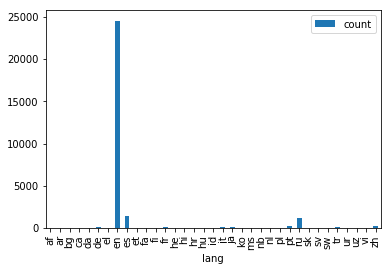

In [105]:
rdf.sort_index().plot(kind="bar")

## saving files

In [106]:
df.rdd.saveAsTextFile("/tmp/SAVED_FILE_2")

In [107]:
df.rdd.getNumPartitions()

2

## parquet

In [108]:
df.write.parquet("data-parquet", "overwrite")

In [109]:
df.rdd.getNumPartitions()

2

In [110]:
df2 = spark.read.parquet("data-parquet")

In [111]:
df2.show()

+--------------------+--------------------+----+----+--------------------+--------+
|                 cat|                desc|  id|lang|                name|provider|
+--------------------+--------------------+----+----+--------------------+--------+
| 6/economics_finance|Learn how debt an...|7620|  en|Financing and Inv...|Coursera|
|3/business_manage...|Develop intercult...|7621|  en|International Lea...|Coursera|
|3/business_manage...|Learn how the dis...|7622|  en|Introduction to S...|Coursera|
| 6/economics_finance|В курсе изучаются...|7623|  ru|Экономика труда (...|Coursera|
|8/engineering_tec...|LaTeX (читается «...|7624|  ru|Документы и презе...|Coursera|
|  14/social_sciences|This course is ab...|7625|  en|Latin American Mi...|Coursera|
|3/business_manage...|This course uses ...|7626|  en|Leadership in 21s...|Coursera|
|9/humanities|14/s...|Based upon the aw...|7627|  en|Learning to Teach...|Coursera|
| 6/economics_finance|Курс посвящен изу...|7628|  ru|Макроэкономика (M...|Co

In [112]:
df.count()

28153

In [113]:
df2.count()

28153

In [114]:
dr = df.rdd

In [115]:
dr.saveAsTextFile("/tmp/rdd_saved_2")

In [116]:
dr.getNumPartitions()

2

In [117]:
dr

MapPartitionsRDD[70] at javaToPython at NativeMethodAccessorImpl.java:0

## bonus

In [118]:
df.show()

+--------------------+--------------------+---+----+--------------------+--------------+
|                 cat|                desc| id|lang|                name|      provider|
+--------------------+--------------------+---+----+--------------------+--------------+
|3/business_manage...|This course intro...|  4|  en|Accounting Cycle:...|Canvas Network|
|              11/law|This online cours...|  5|  en|American Counter ...|Canvas Network|
|5/computer_scienc...|This course is ta...|  6|  fr|Arithmétique: en ...|Canvas Network|
|  14/social_sciences|We live in a digi...|  7|  en|Becoming a Dynami...|Canvas Network|
|2/biology_life_sc...|This self-paced c...|  8|  en|           Bioethics|Canvas Network|
|9/humanities|15/m...|This game-based c...|  9|  en|College Foundatio...|Canvas Network|
|  14/social_sciences|What’s in your di...| 10|  en|Digital Literacies I|Canvas Network|
|  14/social_sciences|The goal of the D...| 11|  en|Digital Literacie...|Canvas Network|
|  14/social_sciences

https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameStatFunctions.freqItems

In [119]:
frq = df.freqItems(["lang", "provider"], 0.3)

In [120]:
frq.show()

+--------------+--------------------+
|lang_freqItems|  provider_freqItems|
+--------------+--------------------+
|  [en, es, ru]|[Lynda, MIT OpenC...|
+--------------+--------------------+



In [121]:
frq.collect()

[Row(lang_freqItems=['en', 'es', 'ru'], provider_freqItems=['Lynda', 'MIT OpenCourseWare', 'Udemy'])]

In [122]:
df.describe().show()

+-------+--------------------+--------------------+------------------+-----+--------------------+----------+
|summary|                 cat|                desc|                id| lang|                name|  provider|
+-------+--------------------+--------------------+------------------+-----+--------------------+----------+
|  count|               28153|               28153|             28153|28153|               28153|     28153|
|   mean|                null|                null|14147.083543494477| null|                null|      null|
| stddev|                null|                null| 8185.672828610868| null|                null|      null|
|    min|                    |	本課程之教學內容以希臘哲學之發展...|                 4|   af|"A Christmas Caro...|          |
|    max|9/humanities|16/l...|靜電靜磁到電磁波相關物理、數學及應...|             28317|   zh|ＦＸ・プライスアクション３大法則－...|Стратоплан|
+-------+--------------------+--------------------+------------------+-----+--------------------+----------+

